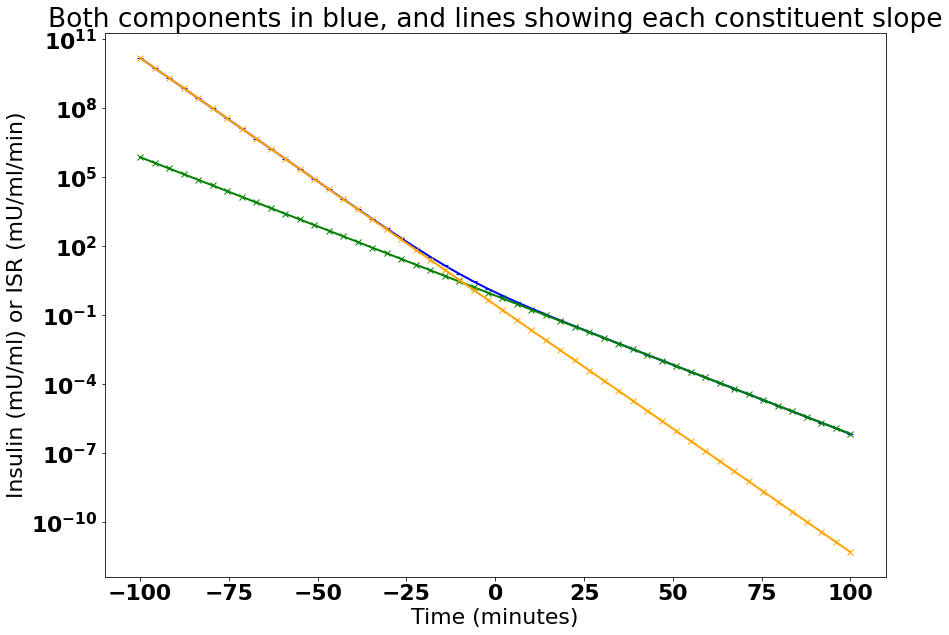

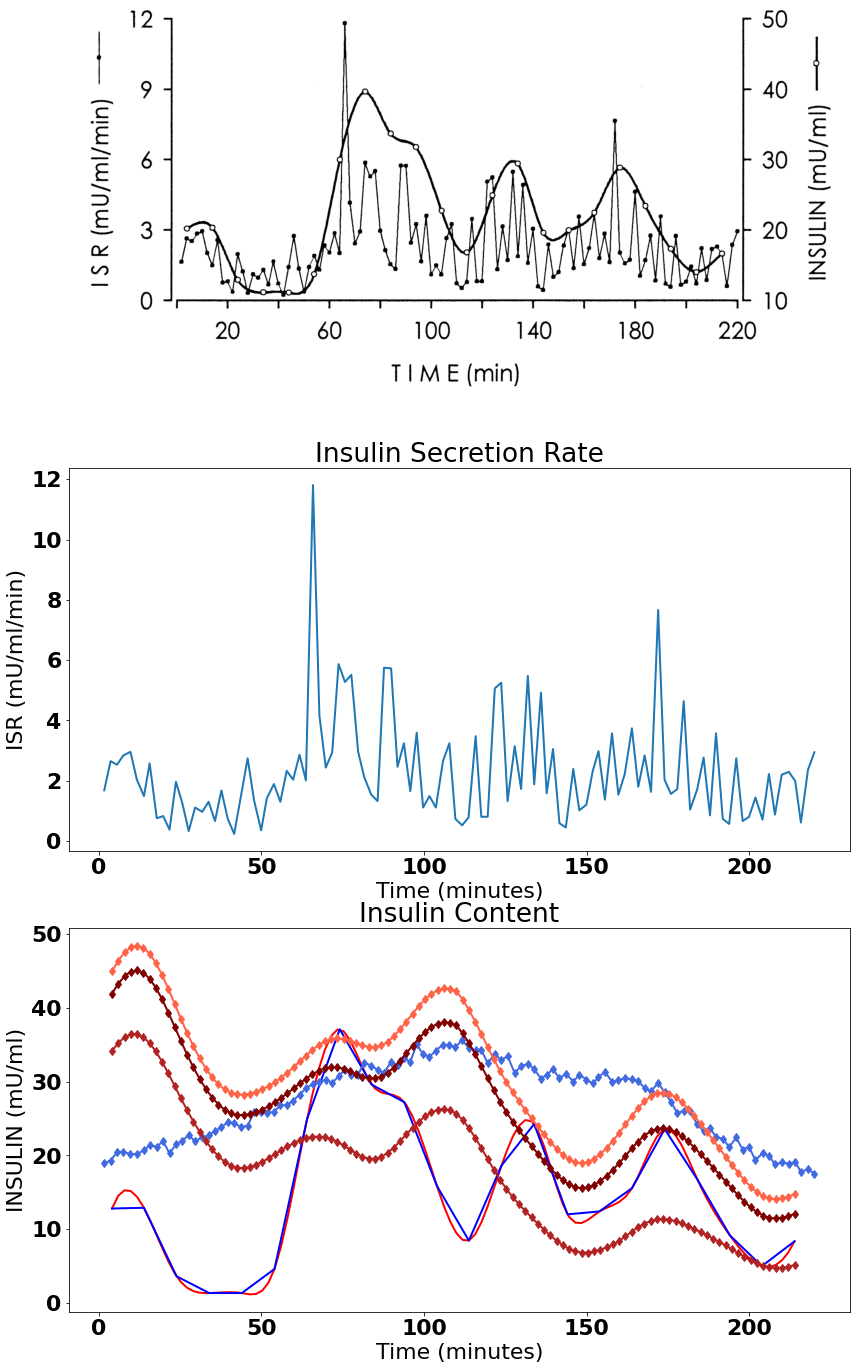

In [3]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import splrep, splev
from scipy.optimize import curve_fit
import urllib.request
import scipy as sp

# set matplotlib display properties
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)


# data from figure 2
# https://diabetes.diabetesjournals.org/content/51/suppl_1/S258.figures-only

#data_ins = pandas.read_csv("Insulin.dat", header = None, delimiter = '\t')

#data_isr = pandas.read_csv("ISR.dat", header = None, delimiter = '\t')

insulin_json = '{"0":{"0":4.143,"1":13.954,"2":23.984,"3":34.014,"4":44.044,"5":54.073,"6":64.103,"7":74.133,"8":83.944,"9":93.974,"10":104.004,"11":113.816,"12":123.845,"13":133.875,"14":144.123,"15":153.935,"16":163.964,"17":173.994,"18":184.024,"19":194.054,"20":203.865,"21":213.895},"1":{"0":12.821,"1":12.919,"2":3.649,"3":1.381,"4":1.381,"5":4.635,"6":24.951,"7":37.081,"8":29.586,"9":27.219,"10":15.878,"11":8.481,"12":18.639,"13":24.26,"14":12.032,"15":12.426,"16":15.582,"17":23.57,"18":16.765,"19":9.172,"20":5.03,"21":8.383}}'
isr_json = '{"0":{"0":1.746,"1":3.71,"2":5.675,"3":7.639,"4":9.821,"5":11.786,"6":13.968,"7":15.714,"8":17.897,"9":19.861,"10":21.825,"11":23.79,"12":25.754,"13":27.718,"14":29.683,"15":31.865,"16":33.829,"17":35.794,"18":37.758,"19":39.722,"20":41.687,"21":43.651,"22":45.833,"23":47.798,"24":49.98,"25":51.726,"26":53.909,"27":55.873,"28":57.837,"29":59.802,"30":61.766,"31":63.73,"32":65.913,"33":67.877,"34":69.841,"35":71.806,"36":73.77,"37":75.734,"38":77.698,"39":79.772,"40":81.627,"41":83.81,"42":85.774,"43":87.738,"44":89.921,"45":91.885,"46":93.849,"47":95.813,"48":97.778,"49":99.742,"50":101.706,"51":103.671,"52":105.853,"53":107.817,"54":109.673,"55":111.746,"56":113.71,"57":115.893,"58":117.639,"59":119.603,"60":121.786,"61":123.75,"62":125.714,"63":127.897,"64":129.861,"65":131.935,"66":133.899,"67":135.972,"68":137.718,"69":139.683,"70":141.647,"71":143.611,"72":145.903,"73":147.758,"74":149.94,"75":151.905,"76":153.651,"77":155.615,"78":157.798,"79":159.762,"80":161.726,"81":163.909,"82":165.873,"83":167.837,"84":169.802,"85":171.984,"86":173.948,"87":175.913,"88":177.877,"89":179.841,"90":181.806,"91":183.988,"92":185.952,"93":187.917,"94":189.772,"95":191.845,"96":193.81,"97":195.992,"98":197.956,"99":199.921,"100":201.885,"101":204.067,"102":206.032,"103":207.887,"104":209.96,"105":212.143,"106":214.107,"107":215.853,"108":218.036,"109":220.0},"1":{"0":1.68,"1":2.651,"2":2.533,"3":2.84,"4":2.959,"5":2.036,"6":1.491,"7":2.58,"8":0.757,"9":0.828,"10":0.379,"11":1.964,"12":1.254,"13":0.331,"14":1.112,"15":0.97,"16":1.302,"17":0.663,"18":1.68,"19":0.734,"20":0.237,"21":1.42,"22":2.746,"23":1.349,"24":0.355,"25":1.42,"26":1.893,"27":1.302,"28":2.331,"29":2.036,"30":2.864,"31":2.012,"32":11.811,"33":4.166,"34":2.438,"35":2.935,"36":5.87,"37":5.278,"38":5.515,"39":2.97,"40":2.13,"41":1.538,"42":1.325,"43":5.751,"44":5.728,"45":2.462,"46":3.243,"47":1.657,"48":3.598,"49":1.112,"50":1.491,"51":1.112,"52":2.651,"53":3.243,"54":0.734,"55":0.521,"56":0.781,"57":3.479,"58":0.805,"59":0.805,"60":5.065,"61":5.254,"62":1.325,"63":3.148,"64":1.728,"65":5.479,"66":1.882,"67":4.923,"68":1.586,"69":3.053,"70":0.592,"71":0.45,"72":2.391,"73":1.018,"74":1.207,"75":2.331,"76":2.982,"77":1.373,"78":3.574,"79":1.538,"80":2.225,"81":3.74,"82":1.799,"83":2.84,"84":1.633,"85":7.669,"86":2.036,"87":1.562,"88":1.728,"89":4.639,"90":1.041,"91":1.716,"92":2.769,"93":0.852,"94":3.574,"95":0.734,"96":0.568,"97":2.746,"98":0.663,"99":0.805,"100":1.444,"101":0.71,"102":2.225,"103":0.876,"104":2.201,"105":2.296,"106":1.988,"107":0.615,"108":2.367,"109":2.947}}'
data_ins = pandas.read_json(insulin_json)
data_isr = pandas.read_json(isr_json)


def main():

    new_length = 110
    new_x = np.linspace(data_ins.iloc[:,0].min(), data_ins.iloc[:,0].max(), new_length)
    new_y = sp.interpolate.interp1d(data_ins.iloc[:,0], data_ins.iloc[:,1], kind='cubic')(new_x)

    # function of a biexponential decay
    # https://swharden.com/blog/2020-09-24-python-exponential-fit/
    # https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_exponential_decay_2phase.htm
    # https://pharmacy.ufl.edu/files/2013/01/two-compartment-model.pdf
    # http://websites.umich.edu/~elements/07chap/html/07prof5.htm
    #
    # "This type of behavior is observed, for example, in the radioactive decay 
    # of a mixture of two nuclides with different half-lives, one short 
    # lived and the other relatively longer-lived."
    # y=ae^(-bt) +ce^(-dt)
    # https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470126714.app4
    #
    # A short introduction to pharmacokinetics
    # R. URSO, P. BLARDI, G. GIORGI
    # https://www.europeanreview.org/wp/wp-content/uploads/6.pdf
    # https://www.certara.com/knowledge-base/simplifying-deconvolution/
    def biExp(x, a, b, c, d):
        return (a * np.exp(x*b)) + (c * np.exp(x*d))



    ################################################################
    # 2.8 and 5.0 minutes and 0.28 percent from                    #
    # Ultradian Oscillations of Insulin Secretion in Humans        #
    # -------------------------------------------------------------#
    # "A deconvolution method based on a biexponential             #
    # disappearance rate of insulin, assuming half-lives           #
    # for insulin of 2.8 and 5 min with a                          #
    # fractional slow component of 28% (19)"                       #
    # ref 19 is https://pubmed.ncbi.nlm.nih.gov/11134098/          #
    # https://doi.org/10.2337/diabetes.51.2007.S258                #
    # -------------------------------------------------------------#
    # Direct measurement of pulsatile insulin secretion from       #
    # the portal vein in human subjects                            #
    # -------------------------------------------------------------#
    # "a biexponential insulin disappearance model in the          #
    # systemic circulation, consisting of earlier directly         #
    # estimated half-lives of 2.8 and 5.0 min and a                #
    # fractional slow component of 0.28 in healthy fasting humans" #
    # https://pubmed.ncbi.nlm.nih.gov/11134098/ (ref 19 above)     #
    # -------------------------------------------------------------#
    # In humans at least 75% of insulin secretion arises from      #
    # punctuated insulin secretory bursts                          #
    # -------------------------------------------------------------#
    # "insulin kinetics of 2.8 min (first half-life),              #
    # 5.0 min (second half-life), and                              #
    # a fractional slow component of 0.28"                         #
    # https://pubmed.ncbi.nlm.nih.gov/9374676/                     #
    # -------------------------------------------------------------#

    a = 1 - 0.28 # I assume from graphpad link that speaks of percent
    b = -np.log(2)/5.0 # 1/minutes
    c = 0.28 # fractional slow component of 0.28?
    d = -np.log(2)/2.8 # 1/minutes

    # See if the exponential function looks correct compared to 
    # Concepts in Clinical Pharmacokinetics
    # By Joseph T. DiPiro
    # Page 78 Figure 6-9
    fig, ax = plt.subplots(1, figsize=(14,10))
    ax.semilogy()
    ax.title.set_text("Both components in blue, and lines showing each constituent slope")
    ax.yaxis.set_label_text("Insulin (mU/ml) or ISR (mU/ml/min)")
    ax.xaxis.set_label_text("Time (minutes)")

    x_window = 100
    x_values = np.linspace(-x_window, x_window)
    # graph both
    ax.plot(x_values, biExp(x_values, a,b,c,d), 
        marker = '_', color = 'blue')

    # only graph the fast part (first)
    ax.plot(x_values, biExp(x_values, a,b,0,d), 
        marker = 'x', color = 'green')

    # only graph the slow part (second)
    ax.plot(x_values, biExp(x_values, 0,b,c,d), 
        marker = 'x', color = 'orange')



    # now calculate the actual convolution
    fig, ax = plt.subplots(3, figsize=(14,24))

    # create a file-like object from the url
    f = urllib.request.urlopen("https://diabetes.diabetesjournals.org/content/diabetes/51/suppl_1/S258/F2.large.jpg?width=800&height=600&carousel=1")

    # turn off axis since they really don't add much
    ax[0].set_axis_off()
    # read the image file in a numpy array
    img = plt.imread(f, format='jpg')
    ax[0].imshow(img, cmap='gray')


    # display ISR which was calculated orginally from the deconvolution
    # of measured Insulin Concentration
    ax[1].title.set_text("Insulin Secretion Rate")
    ax[1].yaxis.set_label_text("ISR (mU/ml/min)")
    ax[1].xaxis.set_label_text("Time (minutes)")
    ax[1].plot(data_isr.iloc[:,0], data_isr.iloc[:,1])


    # display non convolution version
    # (needs some smoothing)
    ax[2].title.set_text("Insulin Content")
    ax[2].yaxis.set_label_text("INSULIN (mU/ml)")
    ax[2].xaxis.set_label_text("Time (minutes)")
    ax[2].plot(new_x, new_y, color = "red")
    ax[2].plot(data_ins.iloc[:,0], data_ins.iloc[:,1], color = "blue")

    # convolution of ISR
    ax[2].plot(data_isr.iloc[:,0], np.convolve(data_isr.iloc[:,1],
        biExp(data_isr.iloc[:,1], a,b,c,d), mode = "same")/5, # bi exponential function
    color = "royalblue", marker = "d")

    ax[2].plot(new_x, np.convolve(new_y,
        biExp(new_y, a,b,c,d), mode = "same") / 10, # bi exponential function
    color = "maroon", marker = "d")

    # break them down to components
    ax[2].plot(new_x, np.convolve(new_y,
        biExp(new_y, 0,b,1,d), mode = "same") / 10, # bi exponential function
    color = "firebrick", marker = "d")


    ax[2].plot(new_x, np.convolve(new_y,
        biExp(new_y, 1,b,0,d), mode = "same") / 10, # bi exponential function
    color = "tomato",  marker = "d")


if __name__ == "__main__":
    main()